<a href="https://colab.research.google.com/github/Avadhoot-Ganoo/CV_Expriments/blob/main/CV_exp5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload the original image


Saving pic3.jfif to pic3 (4).jfif


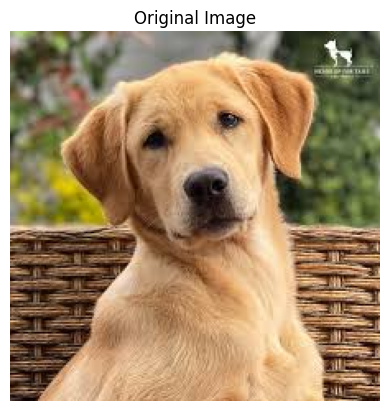

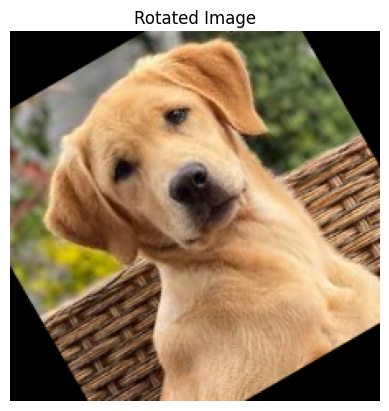

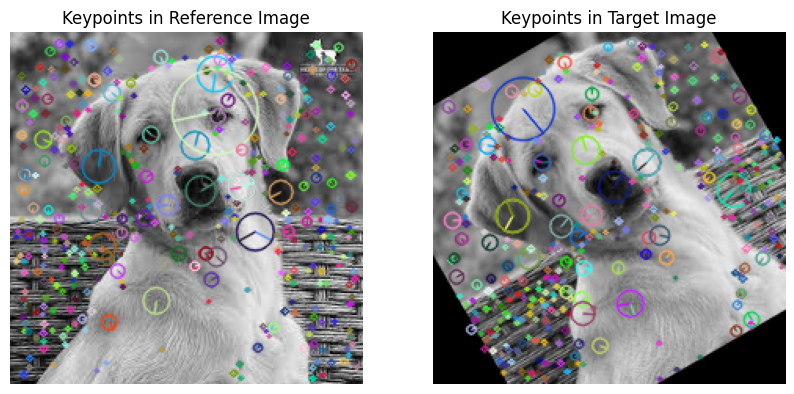

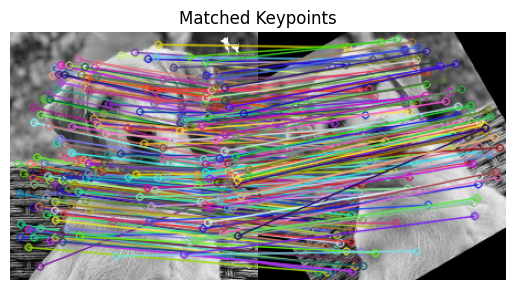

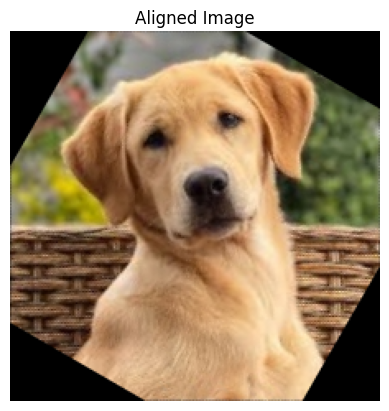

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display, Image

def upload_image(prompt):
    print(prompt)
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    return filename

# Step 1: Upload an original image
original_image = upload_image("Please upload the original image")

# Step 2: Load and display the original image
orig_img = cv2.imread(original_image)
plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()

def rotate_image(image_path, angle=30):
    img = cv2.imread(image_path)
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, M, (w, h))
    rotated_image_path = "rotated_image.jpg"
    cv2.imwrite(rotated_image_path, rotated_img)
    return rotated_image_path, rotated_img

# Step 3: Rotate the image
rotated_image, rotated_img = rotate_image(original_image)
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image")
plt.axis("off")
plt.show()

def align_images(reference_path, target_path):
    ref_img = cv2.imread(reference_path, cv2.IMREAD_GRAYSCALE)
    target_img = cv2.imread(target_path, cv2.IMREAD_GRAYSCALE)

    # Step 4: Detect keypoints and descriptors using SIFT
    sift = cv2.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(ref_img, None)
    keypoints2, descriptors2 = sift.detectAndCompute(target_img, None)

    # Step 5: Draw keypoints on both images
    img_keypoints1 = cv2.drawKeypoints(ref_img, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    img_keypoints2 = cv2.drawKeypoints(target_img, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img_keypoints1, cmap='gray')
    plt.title("Keypoints in Reference Image")
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(img_keypoints2, cmap='gray')
    plt.title("Keypoints in Target Image")
    plt.axis("off")
    plt.show()

    # Step 6: Match features using FLANN
    index_params = dict(algorithm=1, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Step 7: Filter good matches using Lowe's ratio test
    good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

    # Step 8: Draw matches
    img_matches = cv2.drawMatches(ref_img, keypoints1, target_img, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img_matches)
    plt.title("Matched Keypoints")
    plt.axis("off")
    plt.show()

    # Step 9: Extract matched keypoints
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Step 10: Compute homography transform
    M, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

    # Step 11: Apply homography to align image
    h, w = ref_img.shape
    aligned_img = cv2.warpPerspective(cv2.imread(target_path), M, (w, h))

    return aligned_img, ref_img

# Step 12: Perform Image Registration
aligned_image, reference_img = align_images(original_image, rotated_image)
plt.imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
plt.title("Aligned Image")
plt.axis("off")
plt.show()